<a href="https://colab.research.google.com/github/debdipta20/Coursersa-Test/blob/main/churn_prediction_using_ann_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#IMPORTING THE NECESSARY LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# LOADING THE EXCEL DATA INTO PANDAS DATAFRAMES

In [ ]:
df = pd.read_csv(r"Churn_Modelling.csv")

In [ ]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
5698,5699,15672966,Cross,682,Spain,Female,64,9,0.00,2,1,1,103318.44,0
1392,1393,15730540,Simpson,794,Spain,Male,45,8,88656.37,2,1,0,116547.31,0
4803,4804,15610002,Chidubem,802,Spain,Male,41,5,0.00,2,1,1,134626.30,0
285,286,15626144,Chu,675,France,Male,40,7,113208.86,2,1,0,34577.36,0
1577,1578,15576714,Manna,687,Spain,Female,21,8,0.00,2,1,1,154767.34,0


In [ ]:
# DROPPING THE COLUMNS WHICH WILL BE NOT REQUIRED FOR PREDICTING CHURN

In [ ]:
df.drop('CustomerId',axis = 'columns',inplace = True)
df.drop('RowNumber',axis = 'columns',inplace = True)
df.drop('Surname',axis = 'columns',inplace = True)

In [ ]:
# VISUALIZING THE VALUES AND DATATYPES

In [ ]:
df.sample(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4770,615,Spain,Male,19,5,0.00,2,1,0,159920.92,0
9859,678,Germany,Male,55,4,129646.91,1,1,1,184125.10,1


In [ ]:
df.dtypes

,0
CreditScore,int64
Geography,object
Gender,object
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64
HasCrCard,int64
IsActiveMember,int64
EstimatedSalary,float64


In [ ]:
df.CreditScore.values

array([619, 608, 502, ..., 709, 772, 792])

In [ ]:
df.EstimatedSalary.values

array([101348.88, 112542.58, 113931.57, ...,  42085.58,  92888.52,
        38190.78])

In [ ]:
#CHECKING IF THERE ARE ANY NULL VALUES OR SPACES IN THE COLUMNS CONTAINING NUMBERS

In [ ]:
pd.to_numeric(df.CreditScore,errors='coerce').isnull()

,CreditScore
0,False
1,False
2,False
3,False
4,False
...,...
9995,False
9996,False
9997,False
9998,False


In [ ]:
df[pd.to_numeric(df.CreditScore,errors='coerce').isnull()]#hence no null values are present

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [ ]:
df[pd.to_numeric(df.Age	,errors='coerce').isnull()]#hence no null values are present

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [ ]:
df[pd.to_numeric(df.Balance,errors='coerce').isnull()]#hence no null values are present

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [ ]:
# VISUALIZING THE SHAPE OF THE DATASET

In [ ]:
df.shape

(10000, 11)

In [ ]:
# df = df.dropna

In [ ]:
df.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9221,655,Germany,Female,37,4,108862.76,1,1,0,79555.08,1
438,800,France,Female,38,2,168190.33,2,1,0,68052.08,0
6423,652,Spain,Male,41,8,115144.68,1,1,0,188905.43,0
2861,525,France,Female,25,6,0.00,2,1,0,89566.64,0
2762,719,Germany,Male,28,3,106070.29,2,1,1,183893.31,0


In [ ]:
#DATA VISUALIZATION OF TENURE RELATION WITH CHURN / AGE OF CUSTOMER RELATION TO CHURN  / CREDIT SCORE RELATION TO CHURN THESE 3 ARE DONE AS THEY ARE ONE OF THE PROMINENT FEATURES

In [ ]:
tenure_churn_no = df[df.Exited==1].Tenure
tenure_churn_yes = df[df.Exited==0].Tenure

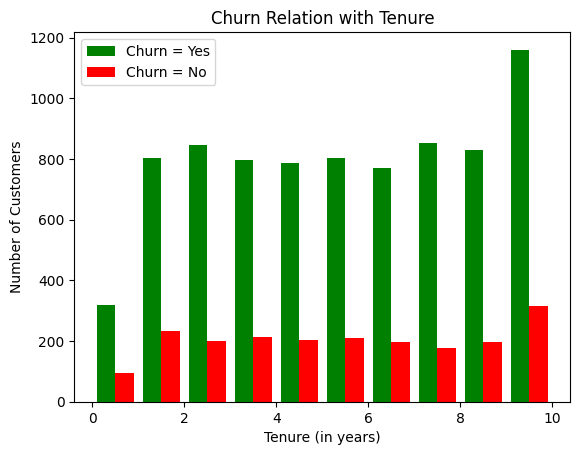

In [ ]:
plt.hist([tenure_churn_yes, tenure_churn_no], color=['green', 'red'], label=['Churn = Yes', 'Churn = No'])
plt.xlabel('Tenure (in years)')
plt.ylabel('Number of Customers')
plt.title('Churn Relation with Tenure')
plt.legend()
# plt.show()

In [ ]:
age_churn_no = df[df.Exited==1].Age
age_churn_yes = df[df.Exited==0].Age

Text(0.5, 1.0, 'age customer relation')

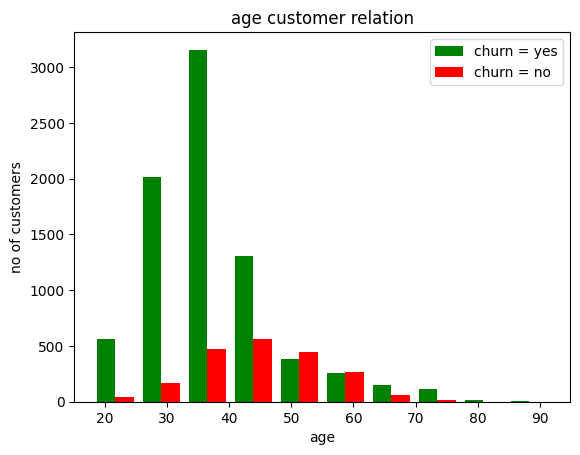

In [ ]:
plt.hist([age_churn_yes,age_churn_no],color=['green','red'],label=['churn = yes','churn = no'])
plt.legend()
plt.xlabel('age')
plt.ylabel('no of customers')
plt.title('age customer relation')

In [ ]:
cs_churn_yes = df[df.Exited==0].CreditScore
cs_churn_no = df[df.Exited==1].CreditScore

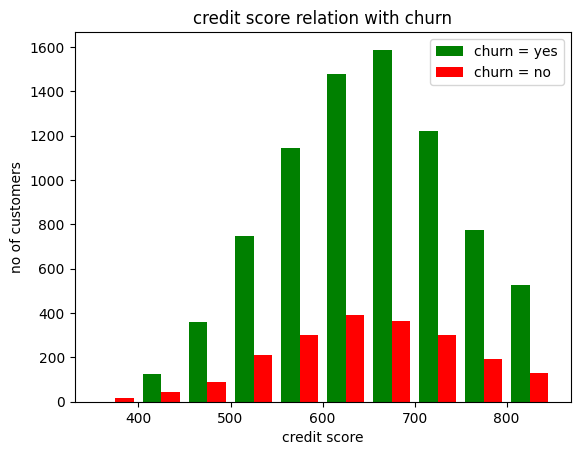

In [ ]:
plt.hist([cs_churn_yes,cs_churn_no],color =['green','red'],label=['churn = yes','churn = no'])
plt.legend()
plt.title('credit score relation with churn')
plt.xlabel('credit score')
plt.ylabel('no of customers')
plt.show()

In [ ]:
# FUNCTION TO CHECK UNIQUE VALUES IN EVERY COLUMN

In [ ]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes == 'object' or 'int64' or 'float64':
            print(f'{column} : {df[column].unique()}')

In [ ]:
#LOOKING FOR CATEGORICAL COLUMNS IN THE DATA AND CONVERTING TO 0 OR 1

In [ ]:
print_unique_col_values(df)

CreditScore : [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593
 801 611 802 745 483 690 492 709 705 

In [ ]:
# df.replace('france','spain',inplace=True)

In [ ]:
df['Gender'].replace({'Female':0,'Male':1},inplace=True)

<ipython-input-111-5644c729bea7>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].replace({'Female':0,'Male':1},inplace=True)
<ipython-input-111-5644c729bea7>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'].replace({'Female':0,'Male':1},inplace=True)


In [ ]:
df.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9093,527,France,1,31,4,0.0,1,1,0,169361.89,0
8840,776,Spain,1,33,2,0.0,2,1,1,176921.00,0
7020,651,France,1,28,7,0.0,2,1,0,823.96,0
6245,591,Spain,1,39,8,0.0,2,0,0,42392.24,0
4657,687,France,1,48,4,0.0,2,1,1,170893.85,0


In [ ]:
print_unique_col_values(df)

CreditScore : [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593
 801 611 802 745 483 690 492 709 705 

In [ ]:
# from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
# Geography_encoded = encoder.fit_transform(df[['Geography']])
# print(Geography_encoded)
# # df['Geography']=Geography_encoded
# scaler = MinMaxScaler()
# encoder = OneHotEncoder(sparse_output = False)

In [ ]:
# DOING ONE HOT ENCODING USING GET_DUMMIES FUNCTION IN PANDAS DATAFRAME TO CONVERT MULTI CATEGORICAL DATA TO MULTI COLUMNS AND PROPER PUTTING OF VALUES

In [ ]:
df1 = pd.get_dummies(data = df,columns=['Geography'],dtype = int)

In [ ]:
df1.sample(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
7287,644,1,32,3,136659.74,1,1,1,14187.78,0,0,0,1
8182,562,1,36,5,0.00,1,0,1,182843.24,0,0,0,1
3652,542,1,34,8,101116.06,1,1,0,196395.05,0,1,0,0
8842,614,0,27,9,106414.57,2,0,0,77500.81,0,1,0,0
7415,812,1,29,6,0.00,2,0,0,168023.60,0,1,0,0


In [ ]:
df1[['Geography_France','Geography_Germany','Geography_Spain']] = df1[['Geography_France','Geography_Germany','Geography_Spain']].astype(int)
df1

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,1,0,0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,1,0,0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,1,0,0
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,0,1,0


In [ ]:
print_unique_col_values(df1)

CreditScore : [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593
 801 611 802 745 483 690 492 709 705 

In [ ]:
df1.dtypes

,0
CreditScore,int64
Gender,int64
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64
HasCrCard,int64
IsActiveMember,int64
EstimatedSalary,float64
Exited,int64


In [ ]:
# USING MIN MAX SCALER TO SCALE THE VALUES IN RANGE OF 0 TO 1 AS THIS HELPS IN BETTER PREDICTION BY ANN

In [ ]:
from sklearn.preprocessing import MinMaxScaler
cols_to_scale =['Balance','EstimatedSalary','CreditScore','Age','Tenure','NumOfProducts']
scaler = MinMaxScaler()
df1[cols_to_scale] = scaler.fit_transform(df1[cols_to_scale])

In [ ]:
df1.sample(3)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
5705,0.556,1,0.297297,0.5,0.724471,0.333333,1,1,0.645544,0,0,1,0
4078,0.612,1,0.391892,0.1,0.000000,0.333333,1,1,0.989846,0,0,0,1
4178,0.320,0,0.189189,0.1,0.000000,0.333333,0,1,0.142532,0,1,0,0


In [ ]:
for col in df1:
    print(f'{col} : {df1[col].unique()}')

CreditScore : [0.538 0.516 0.304 0.698 1.    0.59  0.944 0.052 0.302 0.668 0.356 0.294
 0.252 0.398 0.57  0.532 0.606 0.474 0.752 0.764 0.572 0.32  0.638 0.992
 0.454 0.812 0.442 0.448 0.122 0.482 0.366 0.406 0.34  0.744 0.25  0.28
 0.908 0.464 0.244 0.23  0.412 0.968 0.62  0.852 0.958 0.574 0.4   0.696
 0.47  0.876 0.61  0.502 0.612 0.75  0.322 0.528 0.784 0.674 0.41  0.506
 0.802 0.462 0.77  0.622 0.65  0.776 0.926 0.614 0.508 0.338 0.628 0.656
 0.814 0.132 0.63  0.854 0.386 0.312 0.286 0.604 0.8   0.758 0.592 0.594
 0.916 0.348 0.838 0.76  0.33  0.846 0.928 0.72  0.126 0.546 0.64  0.544
 0.87  0.51  0.258 0.67  0.376 0.424 0.742 0.556 0.636 0.956 0.648 0.55
 0.164 0.84  0.816 0.89  0.672 0.878 0.478 0.222 0.468 0.458 0.626 0.664
 0.886 0.682 0.27  0.6   0.808 0.37  0.732 0.378 0.712 0.472 0.562 0.734
 0.9   0.666 0.708 0.53  0.634 0.268 0.26  0.456 0.324 0.512 0.494 0.856
 0.328 0.35  0.73  0.46  0.914 0.342 0.818 0.332 0.722 0.536 0.586 0.642
 0.678 0.54  0.652 0.444 0.69  0.484 0.

In [ ]:
#DIVIDING THE DATASET INTO INDEPENDENT COLUMNS THAT WILL HELP THE DEPENDENT COLUMN WE WILL PREDICT AND THE DEPENDENT CPLUMN HERE CHURN(EXITED) WHICH WE WILL PREDICT

In [ ]:
x = df1.drop('Exited',axis ='columns')
y = df1['Exited']

In [ ]:
#DIVIDING THE DATASET INTO TRAINING AND TESTING PART USING TRAIN TEST SPLIT

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
# VISUALIZING THE SHAPE OF SPLITTED DATASET THAT WE WILL BE PROVIDING TO THE NEURAL NETWORK

In [ ]:
x_train.shape

(8000, 12)

In [ ]:
x_test.shape

(2000, 12)

In [ ]:
y_test.shape

(2000,)

In [ ]:
x_train[:10]

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
9254,0.672,1,0.189189,0.6,0.000000,0.333333,1,1,0.895494,1,0,0
1561,0.564,1,0.324324,0.4,0.476786,0.333333,1,1,0.979930,0,1,0
1670,0.418,1,0.081081,0.3,0.457317,0.000000,1,0,0.429438,0,0,1
6087,0.422,0,0.121622,0.9,0.540606,0.000000,1,0,0.765417,1,0,0
6669,0.334,1,0.513514,0.9,0.566554,0.000000,0,0,0.197401,1,0,0
5933,0.438,1,0.310811,0.4,0.479252,0.000000,1,0,0.815770,1,0,0
8829,0.666,0,0.297297,0.1,0.000000,0.333333,0,0,0.378788,1,0,0
7945,0.818,0,0.364865,0.8,0.000000,0.333333,1,1,0.496246,1,0,0
3508,0.152,0,0.216216,0.3,0.000000,0.333333,1,1,0.306125,1,0,0
2002,0.502,1,0.756757,0.2,0.000000,0.333333,0,1,0.257740,1,0,0


In [ ]:
y_train[:10]

,Exited
9254,0
1561,0
1670,1
6087,1
6669,1
5933,1
8829,0
7945,0
3508,0
2002,0


In [ ]:
# CHECKING THE LENGTH OF INDEPENDENT TRAINING COLUMNS WHICH WILL BE THE INPUT TO THE NEURAL NETWORK

In [ ]:
len(x_train.columns)

12

In [ ]:
# IMPORTING THE TENSORFLOW AND KERAS LIBRARIES

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
# CREATING THE MODEL ARCHITECTURE

In [ ]:
model = keras.Sequential([keras.layers.Dense(10,input_shape=(12,),activation ='relu'),
                          keras.layers.Dense(5,activation='tanh'),
                          keras.layers.Dense(1,activation='sigmoid'),])
model.compile(optimizer='adam',loss ='binary_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#FITTING THE MODEL AND TRAINING IT ON 100 EPOCHS

In [ ]:
model.fit(x_train,y_train,epochs = 100)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7990 - loss: 0.5091
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7966 - loss: 0.4776
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8086 - loss: 0.4564
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8108 - loss: 0.4497
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8155 - loss: 0.4375
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8110 - loss: 0.4366
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8239 - loss: 0.4123
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8305 - loss: 0.4046
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8255 - loss: 0.4103
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8281 - loss: 0.4111
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8291 - loss: 0.3960
Epoch 12/100
250/250 ━━━━━━━━━━━━━━━━━━━━

In [ ]:
#EVALUATING THE MODEL ACCURACY WITH THE TEST SET

In [ ]:
model.evaluate(x_test,y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8575 - loss: 0.3415


[0.34329673647880554, 0.8604999780654907]

In [ ]:
yp = model.predict(x_test)
yp[:5]

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[0.05839277],
       [0.01923277],
       [0.1343459 ],
       [0.07846134],
       [0.05695264]], dtype=float32)

In [ ]:
y_test[:5]

,Exited
6252,0
4684,0
1731,0
4742,0
4521,0


In [ ]:
#AS THE VALUES OF CHURN ARE IN BETWEEN 0 TO 1 , SO IF THE VALUES ARE ABOVE .5 WE ARE TAKING IT AS 1 I.E. EXITED OR IF THE VALUE IS BELOW .5 WE ARE TAKING IT AS 0 I.E. NOT EXITED

In [ ]:
y_pred=[]
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [ ]:
y_pred[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

In [ ]:
# IMPORT CONFUSION MATRIX FROM SKLEARN LIBRARY TO CHECK THE METRIC VALUES LIKE ACCURACY,PRECISION RECALL,F1SCORE

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1607
           1       0.70      0.51      0.59       393

    accuracy                           0.86      2000
   macro avg       0.79      0.73      0.75      2000
weighted avg       0.85      0.86      0.85      2000



In [ ]:
#VISUALIZING THE CONFUSION MATRIX OF THE MODELS TRULY PREDICTED VS FALSELY PREDICTED

Text(95.72222222222221, 0.5, 'true value')

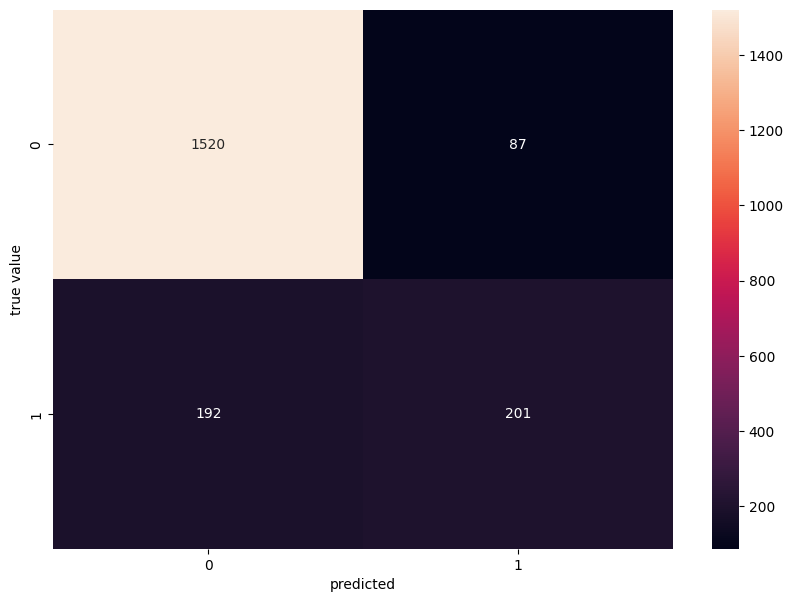

In [ ]:
import seaborn as sns
cm  = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('true value')

In [ ]:
# SAVING THE MODEL FOR FUTURE USE AND REFERENCE AND CAN BE USED TO PREDICT IN THE FUTURE WITHOUT THE NEED TO TRAIN THE ENTIRE MODEL FROM THE

In [ ]:
model.save('churn_model.keras')